# Poisson distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

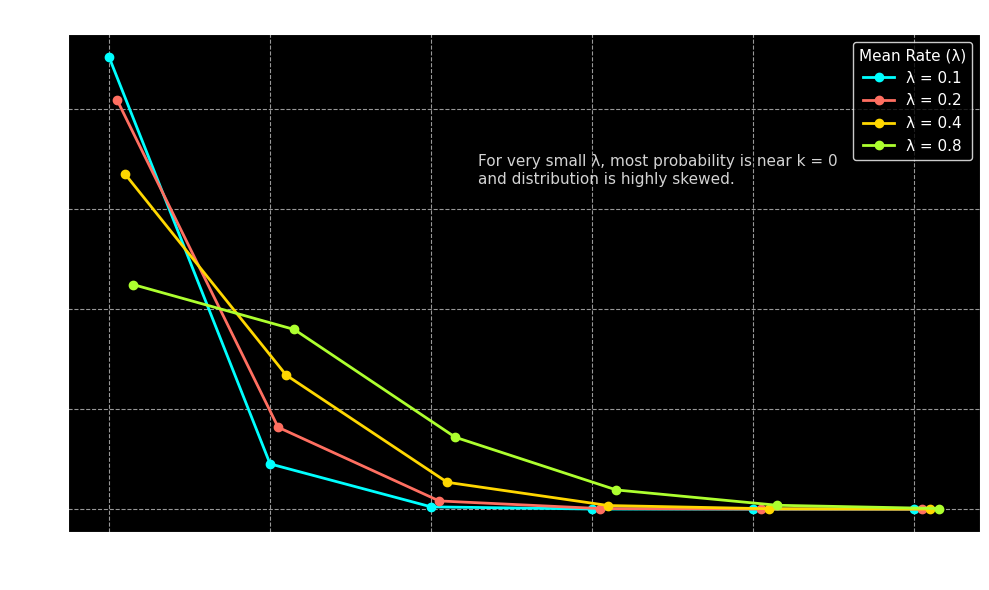

In [2]:
# here lambda < 1
# Define small lambda values
# lambdas = [0.1, 0.2, 0.4, 0.8, 0.9, 1.0]
lambdas = [0.1, 0.2, 0.4, 0.8, ]

plt.figure(figsize=(10, 6))
plt.style.use('dark_background')  # black background

# Bright contrasting colors
colors = ['#00FFFF', '#FF6F61', '#FFD700', '#ADFF2F', '#FF69B4', '#7FFF00']  
# cyan, coral, gold, green-yellow, hot pink, chartreuse, orange

# Plot Poisson PMF for each λ
for i, lam in enumerate(lambdas):
    x = np.arange(0, 6)  # fixed range for small λ
    pmf = poisson.pmf(x, lam)
    plt.plot(x + i*0.05, pmf, 'o-', color=colors[i], label=f'λ = {lam}', linewidth=2, markersize=6)  # slight offset for visibility

# Add labels and title
plt.title("Poisson Distributions for Small λ Values", fontsize=16, fontweight='bold', color='white')
plt.xlabel("Number of Events (k)", fontsize=13, color='white')
plt.ylabel("Probability P(X = k)", fontsize=13, color='white')

# Customize ticks and legend
plt.tick_params(colors='white', labelsize=11)
plt.legend(title="Mean Rate (λ)", fontsize=11, title_fontsize=11, facecolor='black', edgecolor='white', labelcolor='white')

# Grid and annotation
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.45, 0.7, "For very small λ, most probability is near k = 0\nand distribution is highly skewed.", 
         fontsize=11, color='lightgray', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [3]:
# step1) Lets animate and save it: lambdas = [0.1, 0.2, 0.4, 0.8, 0.9, 1.0, 1.3]
from matplotlib.animation import FuncAnimation, PillowWriter

# Lambda values to animate
lambdas = [0.1, 0.2, 0.4, 0.8, 0.9, 1.0, 1.3]

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('dark_background')

# Fixed x-range for small λ
x = np.arange(0, 6)

# Set up plot elements
line, = ax.plot([], [], 'o-', lw=2, markersize=6, color='cyan')
ax.set_xlim(-0.5, 6)
ax.set_ylim(0, 1)
ax.set_xlabel("Number of Events (k)", color='white', fontsize=12)
ax.set_ylabel("Probability P(X = k)", color='white', fontsize=12)
ax.set_title("Poisson Distribution Animation", color='white', fontsize=16)
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.3)
text_label = ax.text(3.5, 0.8, "", color='lightgray', fontsize=12)

# Animation update function
def update(frame):
    lam = lambdas[frame]
    pmf = poisson.pmf(x, lam)
    line.set_data(x, pmf)
    text_label.set_text(f"λ = {lam}")
    return line, text_label

# Create animation
anim = FuncAnimation(fig, update, frames=len(lambdas), interval=1000, blit=True)

# Save animation as GIF or MP4
anim.save("poisson_animation.gif", writer='pillow', fps=1)  # GIF
# anim.save("poisson_animation.mp4", writer='ffmpeg', fps=1)  # MP4

plt.close()


In [4]:
# step2) Lets animate and save it: lambdas = [1, 2, 3, 4, 8, 13, 20]
from matplotlib.animation import FuncAnimation, PillowWriter

# Lambda values to animate
lambdas = [1, 2, 3, 4, 8, 13, 20]

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('dark_background')

# Set up plot elements
line, = ax.plot([], [], 'o-', lw=2, markersize=6, color='cyan')
ax.set_xlabel("Number of Events (k)", color='white', fontsize=12)
ax.set_ylabel("Probability P(X = k)", color='white', fontsize=12)
ax.set_title("Poisson Distribution Animation", color='white', fontsize=16)
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.3)
text_label = ax.text(0.5, 0.8, "", color='lightgray', fontsize=12, transform=ax.transAxes)

# Animation update function
def update(frame):
    lam = lambdas[frame]
    x = np.arange(0, int(lam + 4*np.sqrt(lam)) + 1)  # dynamic range for each λ
    pmf = poisson.pmf(x, lam)
    line.set_data(x, pmf)
    ax.set_xlim(-0.5, max(x)+0.5)
    ax.set_ylim(0, max(pmf)*1.2)
    text_label.set_text(f"λ = {lam}")
    return line, text_label

# Create animation
anim = FuncAnimation(fig, update, frames=len(lambdas), interval=1000, blit=True)

# Save as GIF or MP4
anim.save("poisson_animation.gif", writer='pillow', fps=1)  # GIF
# anim.save("poisson_animation.mp4", writer='ffmpeg', fps=1)  # MP4

plt.close()


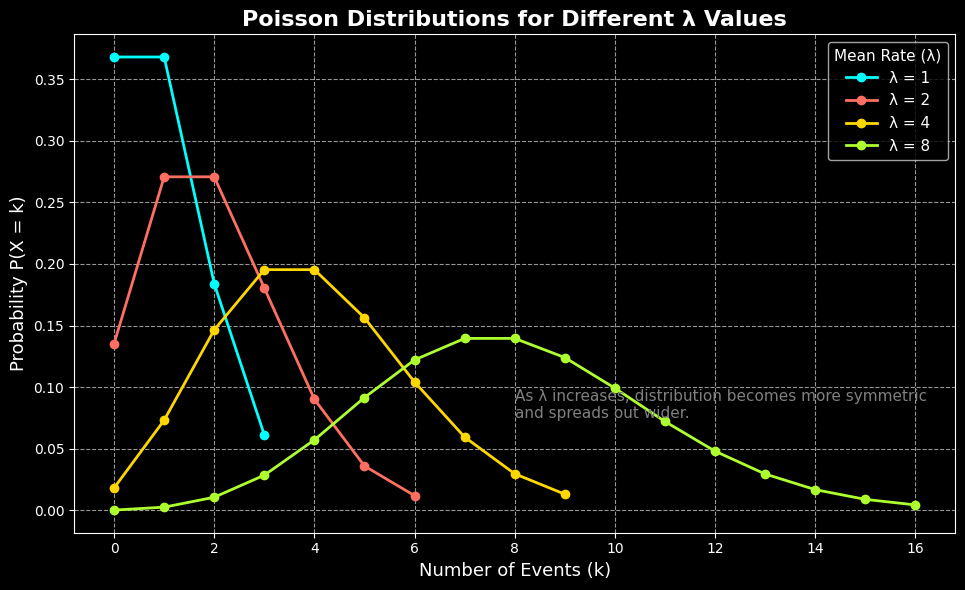

In [5]:
# here lambda > 1
# Define lambda values
lambdas = [1, 2, 4, 8,]

# Create figure
plt.figure(figsize=(10, 6))

plt.style.use('dark_background')

# Define bright contrasting colors
colors = ['#00FFFF', '#FF6F61', '#FFD700', '#ADFF2F']  # cyan, coral, gold, green-yellow

# Plot Poisson PMF for each λ
for i, lam in enumerate(lambdas):
    x = np.arange(0, lam + 3 * np.sqrt(lam))  # dynamic range
    pmf = poisson.pmf(x, lam)
    plt.plot(x, pmf, 'o-', color=colors[i], label=f'λ = {lam}', linewidth=2, markersize=6)

# Add labels and title
plt.title("Poisson Distributions for Different λ Values", fontsize=16, fontweight='bold')
plt.xlabel("Number of Events (k)", fontsize=13, color='white')
plt.ylabel("Probability P(X = k)", fontsize=13, color='white')
plt.legend(title="Mean Rate (λ)", fontsize=11, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotation for interpretation
plt.text(0.5, 0.23, "As λ increases, distribution becomes more symmetric\nand spreads out wider.", 
         fontsize=11, color='gray', transform=plt.gca().transAxes)

# Show plot
plt.tight_layout()
plt.show()


For λ = 1, the distribution is skewed right (rare events).

For λ = 4, it starts to smooth out.

For λ = 10 or 20, it becomes approximately symmetric, approaching a Normal distribution shape.

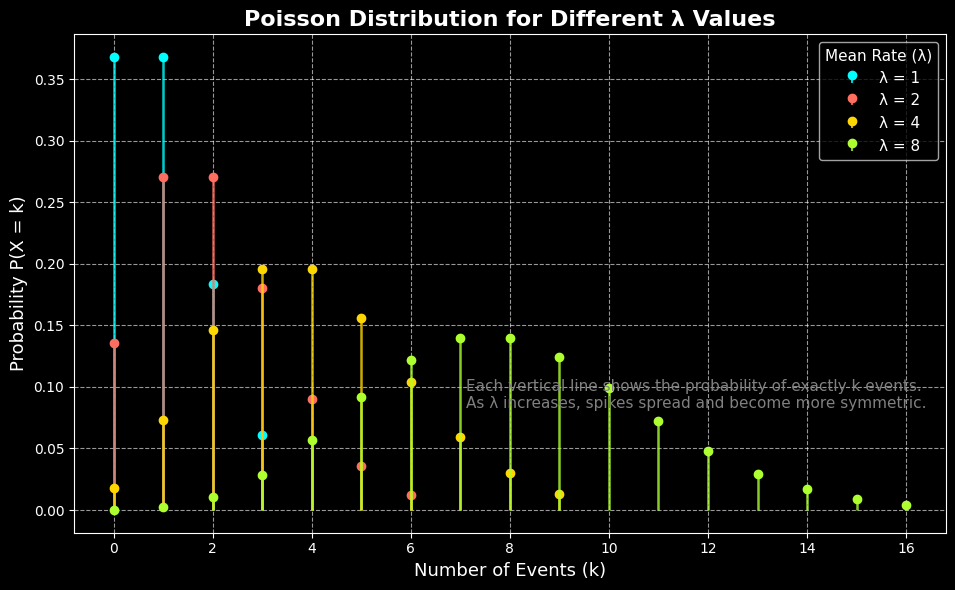

In [6]:
# OPTIONAL
# Define lambda values
lambdas = [1, 2, 4, 8,]

# Create figure and apply style
plt.figure(figsize=(10, 6))

plt.style.use('dark_background')

# Define bright contrasting colors
colors = ['#00FFFF', '#FF6F61', '#FFD700', '#ADFF2F']  # cyan, coral, gold, green-yellow

# Plot each Poisson distribution
for i, lam in enumerate(lambdas):
    x = np.arange(0, lam + 3 * np.sqrt(lam), 1)
    pmf = poisson.pmf(x, lam)
    
    # Create stem plot (without specifying color in fmt)
    markerline, stemlines, baseline = plt.stem(x, pmf, basefmt=" ", label=f'λ = {lam}')
    
    # Apply color and style manually
    plt.setp(stemlines, color=colors[i], linewidth=1.8, alpha=0.8)
    plt.setp(markerline, color=colors[i], markersize=6)
    plt.setp(baseline, visible=False)

# Add titles and labels
plt.title("Poisson Distribution for Different λ Values", fontsize=16, fontweight='bold')
plt.xlabel("Number of Events (k)", fontsize=13, color='white')
plt.ylabel("Probability P(X = k)", fontsize=13, color='white')
plt.legend(title="Mean Rate (λ)", fontsize=11, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

# Add explanatory note
plt.text(0.45, 0.25, 
         "Each vertical line shows the probability of exactly k events.\nAs λ increases, spikes spread and become more symmetric.", 
         fontsize=11, color='gray', transform=plt.gca().transAxes)

# Optimize layout and show
plt.tight_layout()
plt.show()


x:[0 1 2 3 4 5 6] ,  PMF:[0.13533528 0.27067057 0.27067057 0.18044704 0.09022352 0.03608941
 0.0120298 ]


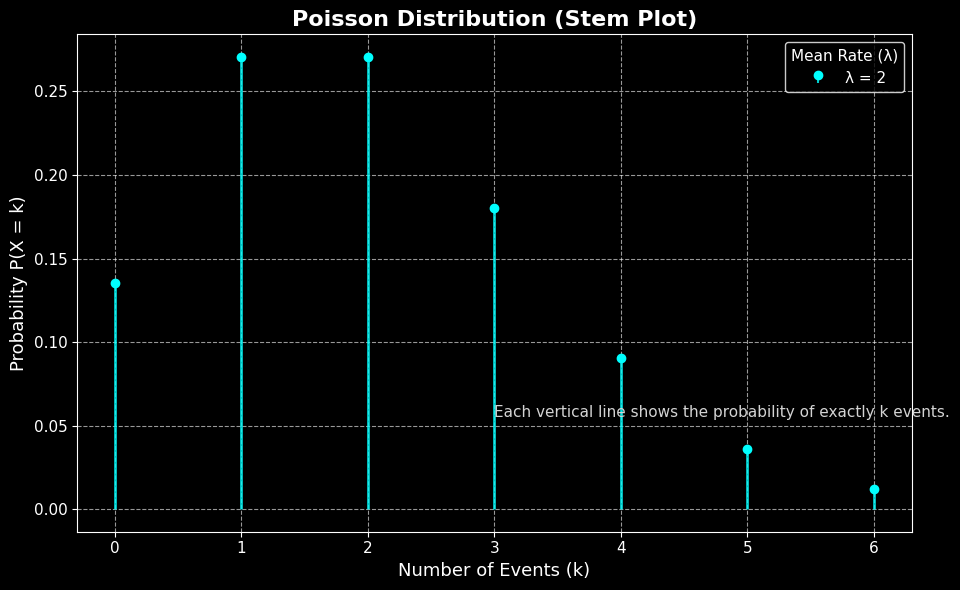

In [7]:
# step1: stem plot
# Define lambda values
lambdas = [2]

# Create figure
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# Bright contrasting colors
colors = ['#00FFFF', '#FF6F61', '#FFD700', '#ADFF2F']  # cyan, coral, gold, green-yellow

# Plot Poisson PMF as stem plot for each λ
for i, lam in enumerate(lambdas):
    x = np.arange(0, int(lam + 3 * np.sqrt(lam)) + 1)  # dynamic range
    pmf = poisson.pmf(x, lam)
    print(f"x:{x} ,  PMF:{pmf}")
    # Create stem plot
    markerline, stemlines, baseline = plt.stem(x, pmf, basefmt=" ", label=f'λ = {lam}')
    
    # Style stems and markers
    plt.setp(stemlines, color=colors[i], linewidth=2, alpha=0.8)
    plt.setp(markerline, color=colors[i], markersize=6)
    plt.setp(baseline, visible=False)

# Add labels and title
plt.title("Poisson Distribution (Stem Plot)", fontsize=16, fontweight='bold', color='white')
plt.xlabel("Number of Events (k)", fontsize=13, color='white')
plt.ylabel("Probability P(X = k)", fontsize=13, color='white')

# Customize ticks and legend
plt.tick_params(colors='white', labelsize=11)
plt.legend(title="Mean Rate (λ)", fontsize=11, title_fontsize=11, facecolor='black', edgecolor='white', labelcolor='white')

# Grid and annotation
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.5, 0.23, "Each vertical line shows the probability of exactly k events.",
         fontsize=11, color='lightgray', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


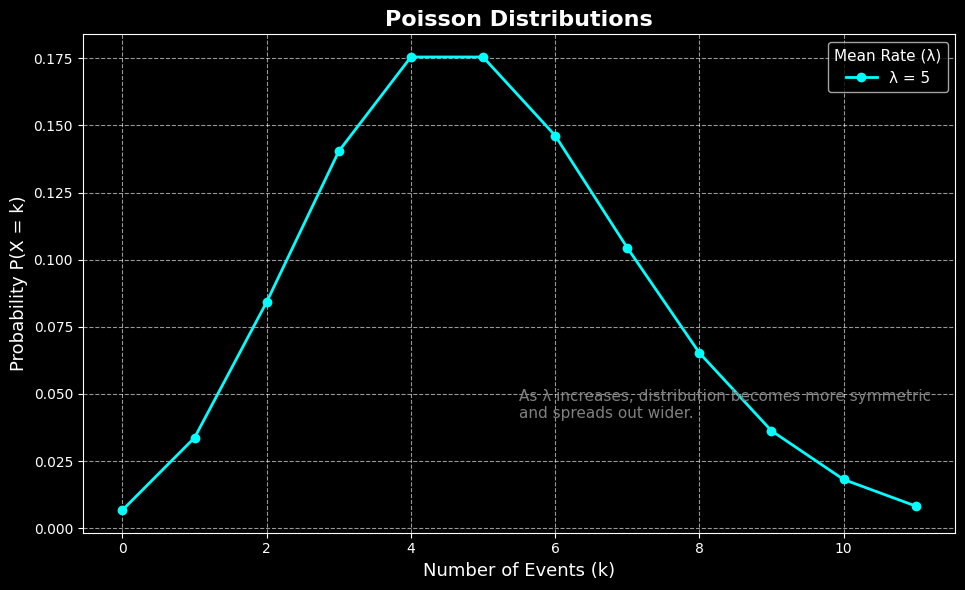

In [8]:
# step2: line plot
# Define lambda values
lambdas = [5]

# Create figure
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# Define bright contrasting colors
colors = ['#00FFFF', '#FF6F61', '#FFD700', '#ADFF2F']  # cyan, coral, gold, green-yellow

# Plot Poisson PMF for each λ
for i, lam in enumerate(lambdas):
    x = np.arange(0, lam + 3 * np.sqrt(lam))  # dynamic range
    pmf = poisson.pmf(x, lam)
    plt.plot(x, pmf, 'o-', color=colors[i], label=f'λ = {lam}', linewidth=2, markersize=6)

# Add labels and title
plt.title("Poisson Distributions", fontsize=16, fontweight='bold')
plt.xlabel("Number of Events (k)", fontsize=13, color='white')
plt.ylabel("Probability P(X = k)", fontsize=13, color='white')
plt.legend(title="Mean Rate (λ)", fontsize=11, title_fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

# Add annotation for interpretation
plt.text(0.5, 0.23, "As λ increases, distribution becomes more symmetric\nand spreads out wider.", 
         fontsize=11, color='gray', transform=plt.gca().transAxes)

# Show plot
plt.tight_layout()
plt.show()
